In [1]:
import numpy as np
import dolfin as dl
from time import time
from nalger_helper_functions import *

circle_center = np.zeros(2)
circle_radius = 1.0

mesh = circle_mesh(circle_center, circle_radius, 0.05)
V = dl.FunctionSpace(mesh, 'CG', 2)

u = dl.Function(V)
u.vector()[:] = np.random.randn(V.dim())

box_min = np.array([-0.3, -0.4])
box_max = np.array([0.8, 1.0])
grid_shape = (51,47)

outside_mesh_fill_value = -1.37

t = time()
U1 = eval_fenics_function_on_regular_grid_using_boxmesh(u, box_min, box_max, grid_shape,
                                                        outside_mesh_fill_value=outside_mesh_fill_value,
                                                        boundary_reflection=False)
dt_boxmesh = time() - t
print('dt_boxmesh=', dt_boxmesh)

t = time()
U2 = eval_fenics_function_on_regular_grid_using_direct_evaluation(u, box_min, box_max, grid_shape,
                                                                  outside_mesh_fill_value=outside_mesh_fill_value)
dt_direct = time() - t
print('dt_direct=', dt_direct)

t = time()
U3 = eval_fenics_function_on_regular_grid_using_pointwise_observation_operator(u, box_min, box_max, grid_shape,
                                                                               outside_mesh_fill_value=outside_mesh_fill_value)
dt_pointwise_obs = time() - t
print('dt_pointwise_obs=', dt_pointwise_obs)

err_boxmesh_vs_direct = np.linalg.norm(U1-U2) / np.linalg.norm(U1)
print('err_boxmesh_vs_direct=', err_boxmesh_vs_direct)

err_pointwiseobs_vs_direct = np.linalg.norm(U2-U3) / np.linalg.norm(U2)
print('err_pointwiseobs_vs_direct=', err_pointwiseobs_vs_direct)


dt_boxmesh= 0.027240276336669922
dt_direct= 0.07030725479125977
dt_pointwise_obs= 0.047162771224975586
err_boxmesh_vs_direct= 4.190247359975549e-15
err_pointwiseobs_vs_direct= 7.933580667148764e-17


closest_point_in_mesh= <function closest_point_in_mesh at 0x7f794e1e4d30>


/home/nick/repos/nalger_helper_functions/nalger_helper_functions/box_function.py:212: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, me.array)


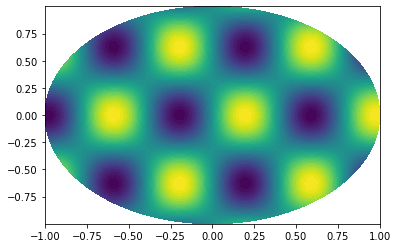

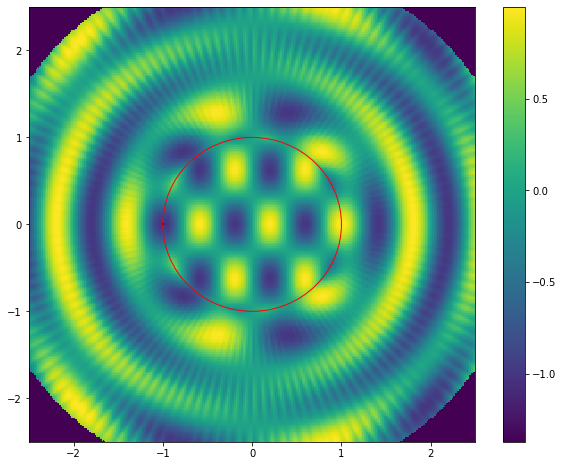

In [2]:
import matplotlib.pyplot as plt

mesh = circle_mesh(circle_center, circle_radius, 0.025)
V = dl.FunctionSpace(mesh, 'CG', 2)

u = dl.interpolate(dl.Expression('sin(8*x[0])*cos(5*x[1])', domain=mesh, degree=5), V)

# u.vector()[:] = np.sign(u.vector()[:])

box_min = np.array([-2.5, -2.5])
box_max = np.array([2.5, 2.5])
grid_shape = (251,247)

U_arr = eval_fenics_function_on_regular_grid_using_boxmesh(u, box_min, box_max, grid_shape,
                                                           outside_mesh_fill_value=outside_mesh_fill_value,
                                                           boundary_reflection=True)

U = BoxFunction(box_min, box_max, U_arr)

dl.plot(u)

U.plot(figsize=(10,8))

circle1 = plt.Circle(circle_center, circle_radius, fill=False, color='r')
plt.gca().add_patch(circle1)

closest_point_in_mesh= <function closest_point_in_mesh at 0x7f794e1e4d30>


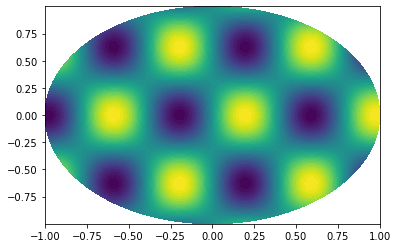

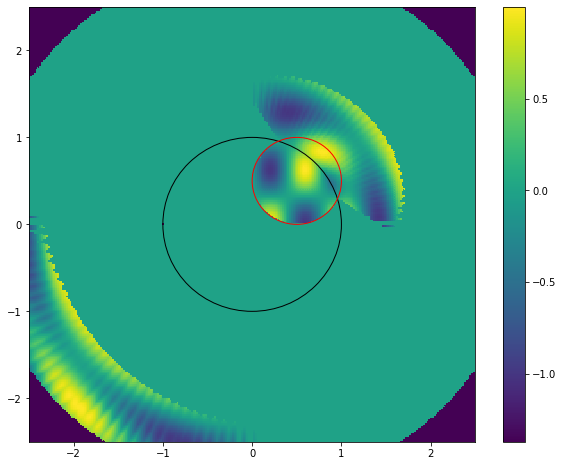

In [3]:
mesh = circle_mesh(circle_center, circle_radius, 0.025)
V = dl.FunctionSpace(mesh, 'CG', 2)

u = dl.interpolate(dl.Expression('sin(8*x[0])*cos(5*x[1])', domain=mesh, degree=5), V)

# u.vector()[:] = np.sign(u.vector()[:])

box_min = np.array([-2.5, -2.5])
box_max = np.array([2.5, 2.5])
grid_shape = (251,247)

mask_center = np.array([0.5, 0.5])
mask_radius = 0.5
mask_function = lambda X: (np.linalg.norm(X - mask_center, axis=1) < mask_radius)

U_arr = eval_fenics_function_on_regular_grid_using_boxmesh(u, box_min, box_max, grid_shape,
                                                           outside_mesh_fill_value=outside_mesh_fill_value,
                                                           boundary_reflection=True,
                                                           mask_function=mask_function)

U = BoxFunction(box_min, box_max, U_arr)

dl.plot(u)

U.plot(figsize=(10,8))

circle1 = plt.Circle(circle_center, circle_radius, fill=False, color='k')
plt.gca().add_patch(circle1)

circle1 = plt.Circle(mask_center, mask_radius, fill=False, color='r')
plt.gca().add_patch(circle1)